# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
!pip install citipy

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


In [46]:
cities


['albany',
 'kulhudhuffushi',
 'wailua homesteads',
 'grytviken',
 'sovetskiy',
 'hawaiian paradise park',
 'saipan',
 'port-aux-francais',
 'taiohae',
 'jamestown',
 'revda',
 'yellowknife',
 'cargados carajos',
 'iqaluit',
 'recani',
 'hunstanton',
 'langepas',
 'fortuna',
 'beaudesert',
 'queenstown',
 'edinburgh of the seven seas',
 'atafu village',
 'bilibino',
 'lebu',
 'buala',
 'holualoa',
 'blackmans bay',
 'mejit',
 'labrador city',
 'simanggang',
 'espargos',
 'fandriana',
 'tazovsky',
 'afaahiti',
 'puerto natales',
 'ilulissat',
 'cabedelo',
 'christchurch',
 'waitangi',
 "nar'yan-mar",
 'kolwezi',
 'margaret river',
 'sosnovo-ozerskoye',
 'covington',
 'invercargill',
 'sao joao da barra',
 'esmeraldas',
 'port elizabeth',
 'lompoc',
 'trinidad',
 'yambio',
 'robbah',
 'college',
 'haiku-pauwela',
 'longyearbyen',
 'halifax',
 'ta`u',
 'ternate',
 'adamstown',
 'ribeira grande',
 'kasane',
 'bethel',
 'urangan',
 'kulia village',
 'vilyuchinsk',
 'terrace',
 'kodiak',
 'u

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url= f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chapaev
Processing Record 2 of Set 1 | quepos
Processing Record 3 of Set 1 | constantia
Processing Record 4 of Set 1 | vorgashor
Processing Record 5 of Set 1 | howrah
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | san mariano
Processing Record 8 of Set 1 | tadine
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | susuman
Processing Record 11 of Set 1 | pacific grove
Processing Record 12 of Set 1 | rawlins
Processing Record 13 of Set 1 | atherton
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | nuuk
Processing Record 16 of Set 1 | oum hadjer
Processing Record 17 of Set 1 | taltal
Processing Record 18 of Set 1 | tindouf
Processing Record 19 of Set 1 | flying fish cove
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | errachidia
Processing Record 22 of Set 1 | narayanpet
Processing Record 23 of Set 1 | 

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chapaev,50.2000,51.1667,14.72,75,5,3.13,KZ,1722042518
1,quepos,9.4236,-84.1652,25.88,88,99,1.25,CR,1722042519
2,constantia,44.1833,28.6500,18.38,81,0,5.28,RO,1722042521
3,vorgashor,67.5833,63.9500,8.60,94,100,2.19,RU,1722042522
4,howrah,22.5892,88.3103,29.00,94,75,2.06,IN,1722042523


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chapaev,50.2000,51.1667,14.72,75,5,3.13,KZ,1722042518
1,quepos,9.4236,-84.1652,25.88,88,99,1.25,CR,1722042519
2,constantia,44.1833,28.6500,18.38,81,0,5.28,RO,1722042521
3,vorgashor,67.5833,63.9500,8.60,94,100,2.19,RU,1722042522
4,howrah,22.5892,88.3103,29.00,94,75,2.06,IN,1722042523


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

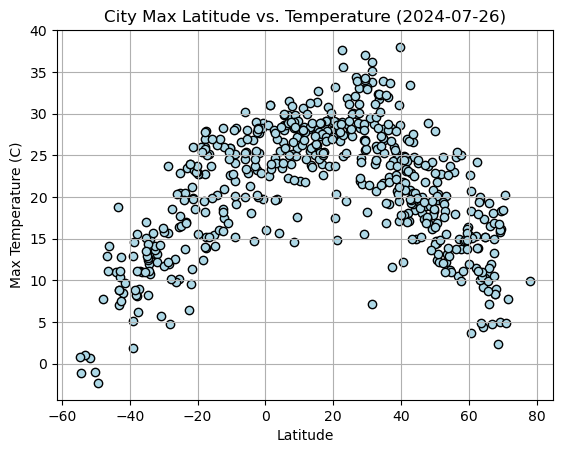

In [43]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolors="black",
    marker="o",
    color="lightblue"
)

# Incorporate the other graph properties
date=time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

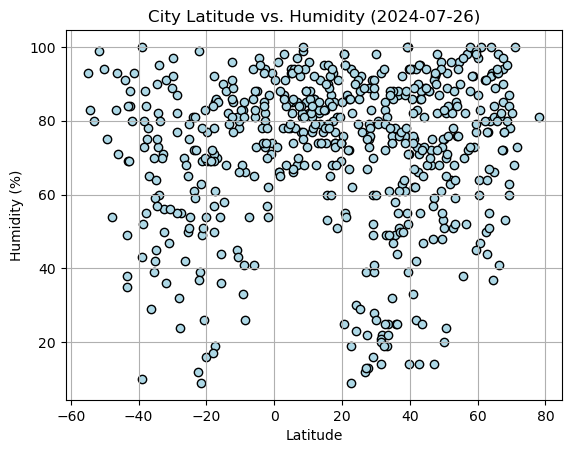

In [45]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolors="black",
    marker="o",
    color="lightblue"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

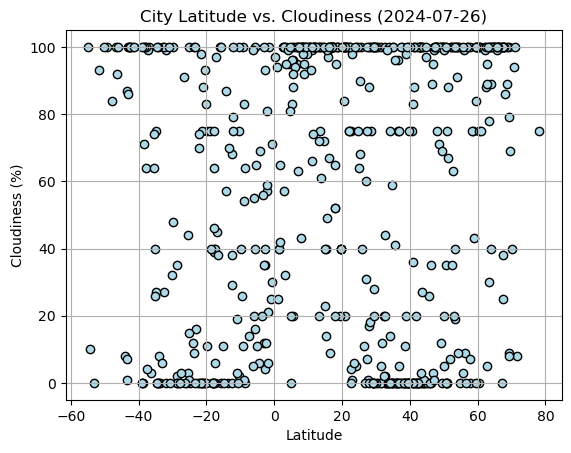

In [49]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolors="black",
    marker="o",
    color="lightblue"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

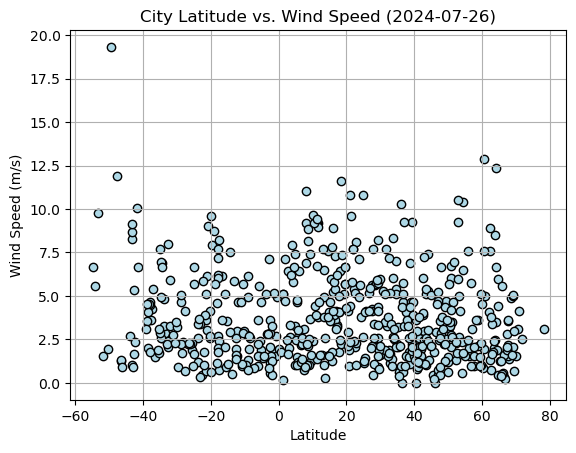

In [51]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolors="black",
    marker="o",
    color="lightblue"
)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [268]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value,y_value,ylabel,text_coord):

    # Compute linear regression for defined function
    (slope, intercept,rvalue,pvalue,stderr)=linregress(x_value,y_value)
    
    regress_value=x_value*slope+intercept
    line_eq=f"y={round(slope,2)}x + {round(intercept,2)}"

    # Create plot and labels for defined function
    plt.scatter(x_value,y_value)
    plt.plot(x_value,regress_value,"r-")
  
    plt.annotate(line_eq,text_coord,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    print(f"The r^value is {rvalue**2}")

 

In [78]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chapaev,50.2000,51.1667,14.72,75,5,3.13,KZ,1722042518
1,quepos,9.4236,-84.1652,25.88,88,99,1.25,CR,1722042519
2,constantia,44.1833,28.6500,18.38,81,0,5.28,RO,1722042521
3,vorgashor,67.5833,63.9500,8.60,94,100,2.19,RU,1722042522
4,howrah,22.5892,88.3103,29.00,94,75,2.06,IN,1722042523


In [80]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,hithadhoo,-0.6000,73.0833,28.89,74,71,4.95,MV,1722042524
7,tadine,-21.5500,167.8833,21.13,63,98,5.09,NC,1722042527
8,puerto natales,-51.7236,-72.4875,0.67,99,93,1.52,CL,1722042528
16,taltal,-25.4000,-70.4833,16.39,65,3,1.87,CL,1722042537
18,flying fish cove,-10.4217,105.6791,25.82,78,75,5.66,CX,1722042540


###  Temperature vs. Latitude Linear Regression Plot

The r^value is 0.4546377830959438


Text(0.5, 1.0, 'Latitude vs. Max Temp Northern Hemisphere')

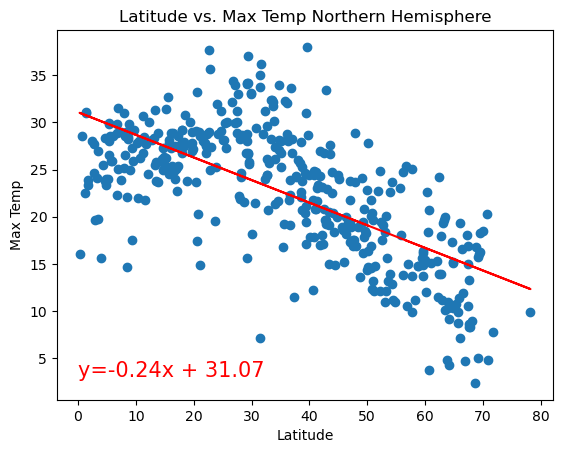

In [272]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]

# Use previously defined function to create regression plot
plot_linear_regression(x_values,y_values,"Max Temp",(0,3))

plt.title("Latitude vs. Max Temp Northern Hemisphere")



The r^value is 0.6475982450669694


Text(0.5, 1.0, 'Latitude vs. Max Temp Southern Hemisphere')

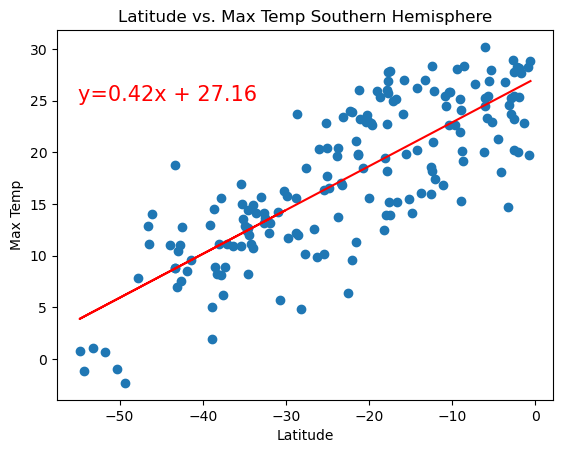

In [266]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]

# Use previously defined function to create regression plot
plot_linear_regression(x_values,y_values,"Max Temp",(-55,25))

plt.title("Latitude vs. Max Temp Southern Hemisphere")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^value is 0.0019313624864028675


Text(0.5, 1.0, 'Latitude vs. Humidity Northern Hemisphere')

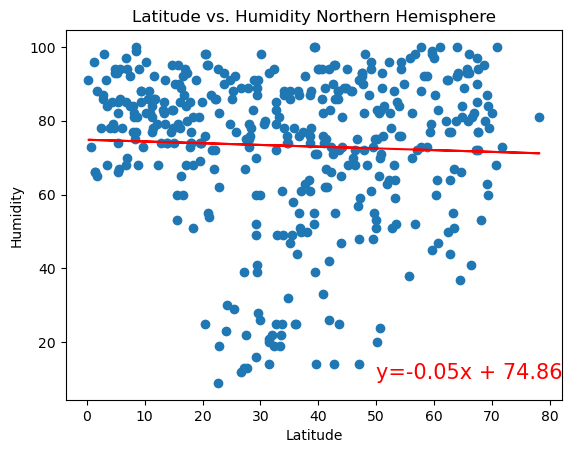

In [276]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]

# Use previously defined function to create regression plot
plot_linear_regression(x_values,y_values,"Humidity",(50,10))

plt.title("Latitude vs. Humidity Northern Hemisphere")

The r^value is 0.0030605339130074113


Text(0.5, 1.0, 'Latitude vs. Humidity Southern Hemisphere')

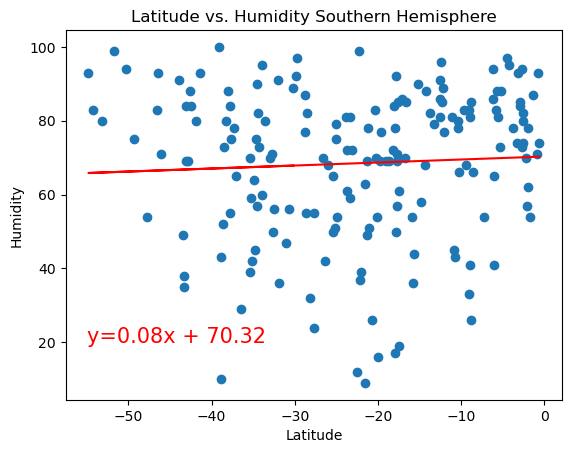

In [280]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]

# Use previously defined function to create regression plot
plot_linear_regression(x_values,y_values,"Humidity",(-55,20))

plt.title("Latitude vs. Humidity Southern Hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^value is 0.00743170402629815


Text(0.5, 1.0, 'Latitude vs. Cloudiness Northern Hemisphere')

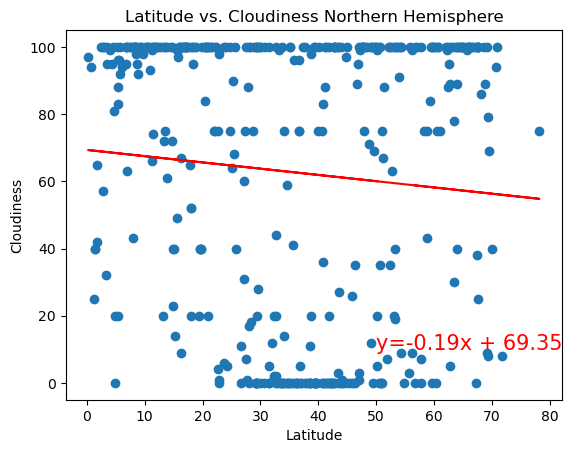

In [284]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]

# Use previously defined function to create regression plot
plot_linear_regression(x_values,y_values,"Cloudiness",(50,10))

plt.title("Latitude vs. Cloudiness Northern Hemisphere")

The r^value is 0.026383472734199928


Text(0.5, 1.0, 'Latitude vs. Cloudiness Southern Hemisphere')

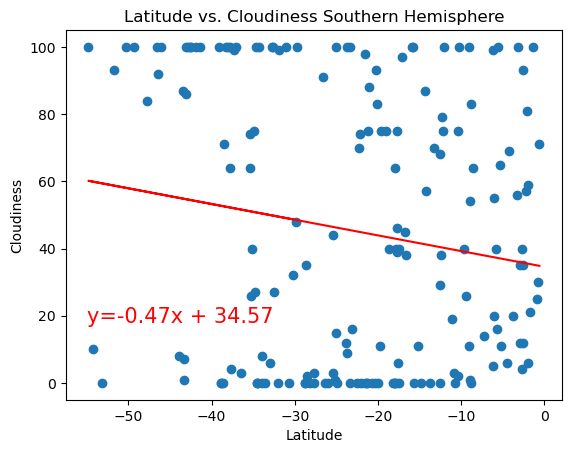

In [288]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]

# Use previously defined function to create regression plot
plot_linear_regression(x_values,y_values,"Cloudiness",(-55,18))

plt.title("Latitude vs. Cloudiness Southern Hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^value is 0.03276983662960461


Text(0.5, 1.0, 'Latitude vs. Wind Speed Northern Hemisphere')

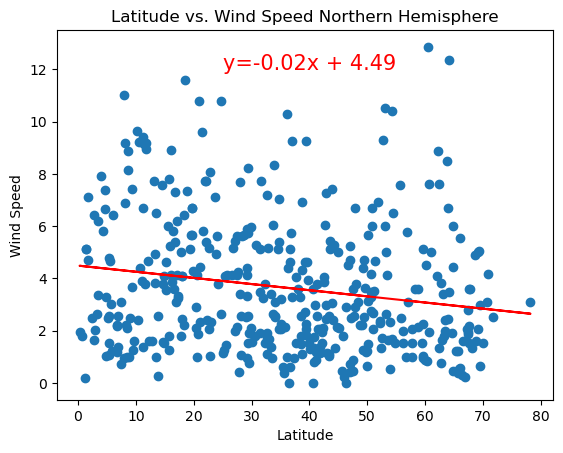

In [294]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]

# Use previously defined function to create regression plot
plot_linear_regression(x_values,y_values,"Wind Speed",(25,12))

plt.title("Latitude vs. Wind Speed Northern Hemisphere")

The r^value is 0.0790697150016254


Text(0.5, 1.0, 'Latitude vs. Wind Speed Southern Hemisphere')

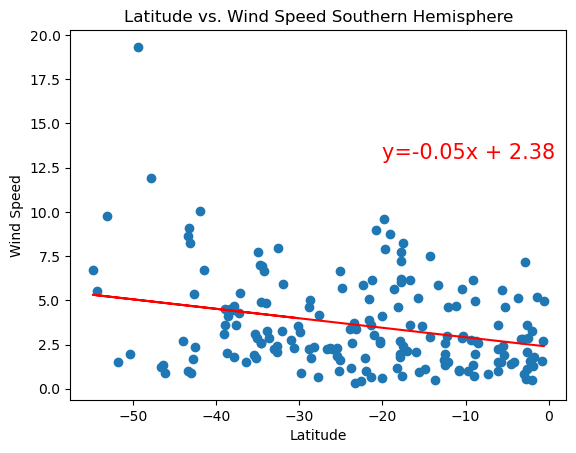

In [300]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]

# Use previously defined function to create regression plot
plot_linear_regression(x_values,y_values,"Wind Speed",(-20,13))

plt.title("Latitude vs. Wind Speed Southern Hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE